In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import os

os.environ['CUDA_VISIBLE_DEVICES']="0"

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


In [2]:
print("\n\n")
print("  numpy version:  %s" % str(np.version.version) )
print("  tensorflow version:  %s" % str(tf.__version__))
print("\n\n")




  numpy version:  1.21.5
  tensorflow version:  2.11.0





## Set model and resolution parameters

In [3]:
train_mu0 = 0.
train_mu1 = 1.
train_rho01 = -0.6

train_sig0 = 1.0
train_sig1 = 1.5

train_cov00 = train_sig0 * train_sig0 
train_cov11 = train_sig1 * train_sig1
train_cov01 = train_rho01 * train_sig0 * train_sig1

train_cov = np.array( [[train_cov00, train_cov01], [train_cov01, train_cov11]] )
train_mu = np.array( [train_mu0, train_mu1])



true_mu0 = 0.2
true_mu1 = 0.8
true_rho01 = -0.6

true_sig0 = 0.9
true_sig1 = 1.3

true_cov00 = true_sig0 * true_sig0 
true_cov11 = true_sig1 * true_sig1
true_cov01 = true_rho01 * true_sig0 * true_sig1

true_cov = np.array( [[true_cov00, true_cov01], [true_cov01, true_cov11]] )
true_mu = np.array( [true_mu0, true_mu1])



#--- resolution is in same dimensions as features (not sigma/val)

#-- for 1d
#res0 = 0.5
#res1 = 0.8

#-- for 1e
#res0 = 0.25
#res1 = 0.4

#-- for 1f
res0 = 0.001
res1 = 0.001


## Plots to visualize these parameter choices

In [4]:

ngen_train = 100000
ngen_true = 10000

train_pts = np.random.multivariate_normal(train_mu, train_cov, size=ngen_train)
true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen_true)

train_det_pts = np.random.normal( train_pts, [res0, res1])

true_det_pts = np.random.normal( true_pts, [res0, res1])



<function matplotlib.pyplot.show(close=None, block=None)>

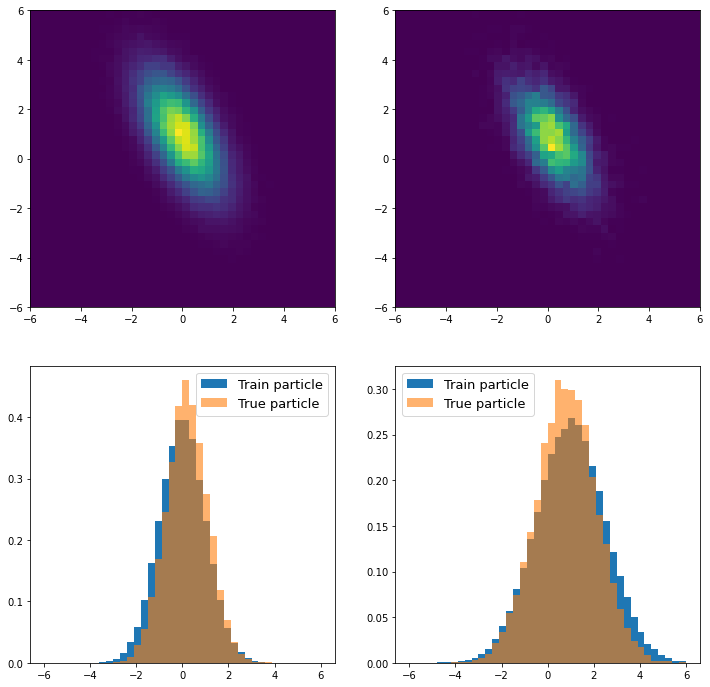

In [5]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='Train particle' )
ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='True particle', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='Train particle' )
ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='True particle', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

In [6]:
train_diff = train_det_pts - train_pts

In [7]:
diff_cov = np.cov( train_diff.T )

In [8]:
diff_cov

array([[1.00340001e-06, 2.00595290e-09],
       [2.00595290e-09, 9.95715471e-07]])

In [9]:
np.sqrt(diff_cov[0,0])

0.0010016985600591432

In [10]:
np.sqrt(diff_cov[1,1])

0.0009978554357451194

<function matplotlib.pyplot.show(close=None, block=None)>

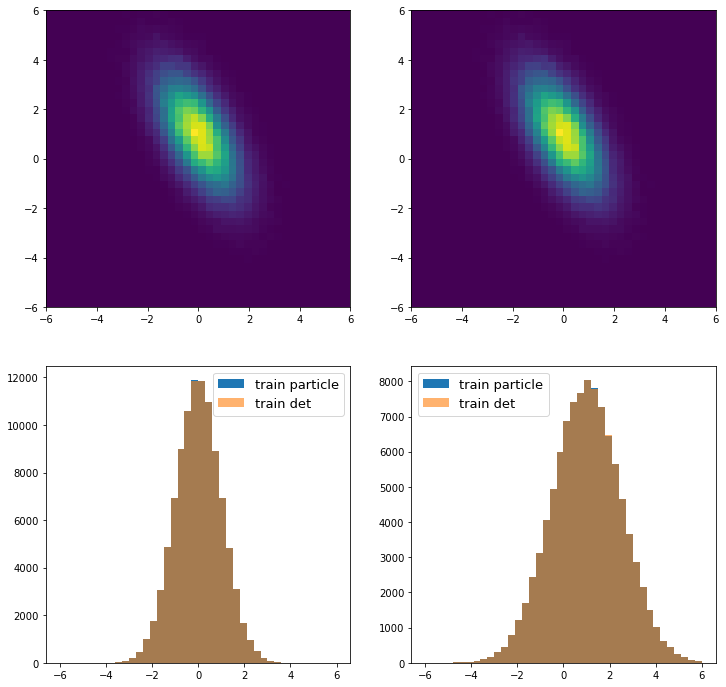

In [11]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

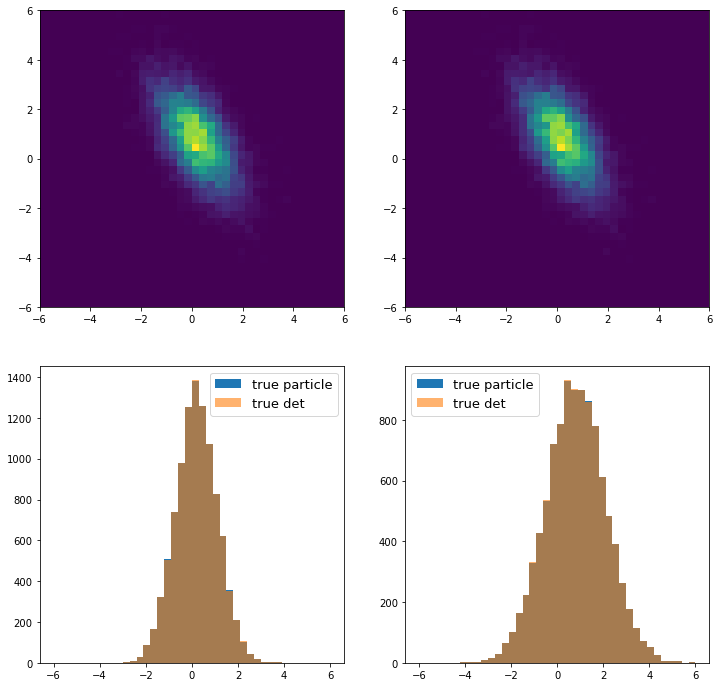

In [12]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)

ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

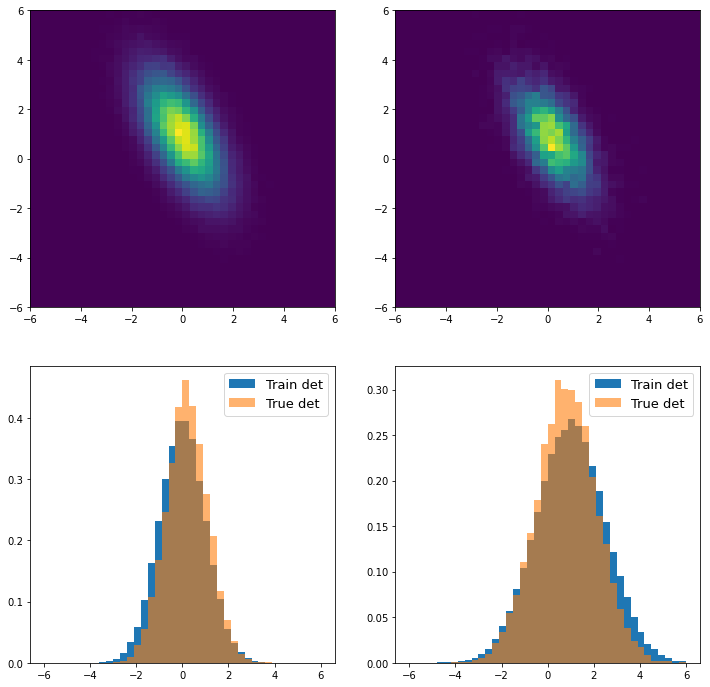

In [13]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_det_pts[:,0], bins=hbins, density=True, range=[hmin,hmax], label='Train det' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, density=True, range=[hmin,hmax], label='True det', alpha=0.6)

ax[1][1].hist( train_det_pts[:,1], bins=hbins, density=True, range=[hmin,hmax], label='Train det' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, density=True, range=[hmin,hmax], label='True det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

## Set up NN model for OmniFold

In [14]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

2023-10-28 13:35:19.744514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-28 13:35:19.761681: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-28 13:35:19.761919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-28 13:35:19.765152: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-28 13:35:19.765341: I tensorflow/compiler/xla/stream_executo

## Package the training data for OmniFold

In [15]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

## Run OmniFold

In [16]:
%%time


verbose = True

of_niter = 4

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)




  shape of theta0_S : (100000, 2)
  shape of theta_unknown_S : (10000, 2)
  shape of xvals_1 :  (110000, 2)



  shape of labels0 : (100000,)
  shape of labels_unknown : (10000,)
  shape of yvals_1 :  (110000,)



  shape of theta0_G : (100000, 2)
  shape of xvals_2 :  (200000, 2)
  shape of yvals_2 :  (200000,)




ITERATION: 1

   -- ITERATION 1  STEP 1

Epoch 1/20


2023-10-28 13:35:21.496810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-28 13:35:21.499405: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55a610188c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-28 13:35:21.499438: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-28 13:35:21.506373: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-28 13:35:21.614522: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 [==============================] - 2s 21ms/step - loss: 0.6178 - accuracy: 0.4631 - val_loss: 0.5301 - val_accuracy: 0.4549
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 0.4831 - accuracy: 0.4544 - val_loss: 0.4221 - val_accuracy: 0.4549
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3906 - accuracy: 0.4544 - val_loss: 0.3561 - val_accuracy: 0.4549
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3456 - accuracy: 0.4544 - val_loss: 0.3354 - val_accuracy: 0.4549
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3348 - accuracy: 0.4544 - val_loss: 0.3299 - val_accuracy: 0.4549
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3287 - accuracy: 0.4544 - val_loss: 0.3231 - val_accuracy: 0.4549
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3226 - accuracy: 0.4544 - val_loss: 0.3182 - val_accuracy: 0.4549
Epoch 8/20
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 0.1266 - accuracy: 0.2931 - val_loss: 0.1286 - val_accuracy: 0.2851
Epoch 19/20
9/9 [==============================] - 0s 4ms/step - loss: 0.1266 - accuracy: 0.2684 - val_loss: 0.1286 - val_accuracy: 0.2565
Epoch 20/20
10/10 [==============================] - 0s 659us/step

   -- ITERATION 2  STEP 2

Epoch 1/20
75/75 [==============================] - 1s 4ms/step - loss: 0.2053 - accuracy: 0.2530 - val_loss: 0.1660 - val_accuracy: 0.2500
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.2500 - val_loss: 0.1658 - val_accuracy: 0.2500
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.2500 - val_loss: 0.1658 - val_accuracy: 0.2500
Epoch 4/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.2500 - val_loss: 0.1658 - val_accuracy: 0.2500
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1654 

75/75 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.2502 - val_loss: 0.1659 - val_accuracy: 0.2494
Epoch 15/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.2502 - val_loss: 0.1659 - val_accuracy: 0.2494
Epoch 16/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.2502 - val_loss: 0.1659 - val_accuracy: 0.2494
Epoch 17/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.2502 - val_loss: 0.1659 - val_accuracy: 0.2494
Epoch 18/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.2502 - val_loss: 0.1660 - val_accuracy: 0.2494
Epoch 19/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.2502 - val_loss: 0.1662 - val_accuracy: 0.2494
Epoch 20/20
10/10 [==============================] - 0s 676us/step

ITERATION: 4

   -- ITERATION 4  STEP 1

Epoch 1/20
9/9 [==============================] - 1s 18ms

In [17]:
of_weights

array([[[0.10805533, 0.10456377, 0.09757517, ..., 0.06099844,
         0.13477959, 0.05674728],
        [0.11572824, 0.10837784, 0.10128633, ..., 0.06436267,
         0.13578115, 0.05807282]],

       [[1.04357636, 0.98630422, 0.99361795, ..., 1.06468606,
         0.96416432, 1.12165177],
        [0.11357372, 0.10686517, 0.10016829, ..., 0.0665478 ,
         0.13099775, 0.0606612 ]],

       [[1.0964992 , 1.01706493, 1.01848435, ..., 0.97560215,
         1.02675247, 1.15662253],
        [0.12995104, 0.10920032, 0.10275992, ..., 0.06598826,
         0.13831182, 0.07284756]],

       [[1.00229335, 1.02087772, 1.02599764, ..., 0.97948271,
         0.99164277, 0.9462266 ],
        [0.13704236, 0.1095103 , 0.10347942, ..., 0.05873671,
         0.13639495, 0.06893534]]])

In [18]:
np.shape( of_weights)

(4, 2, 100000)

<function matplotlib.pyplot.show(close=None, block=None)>

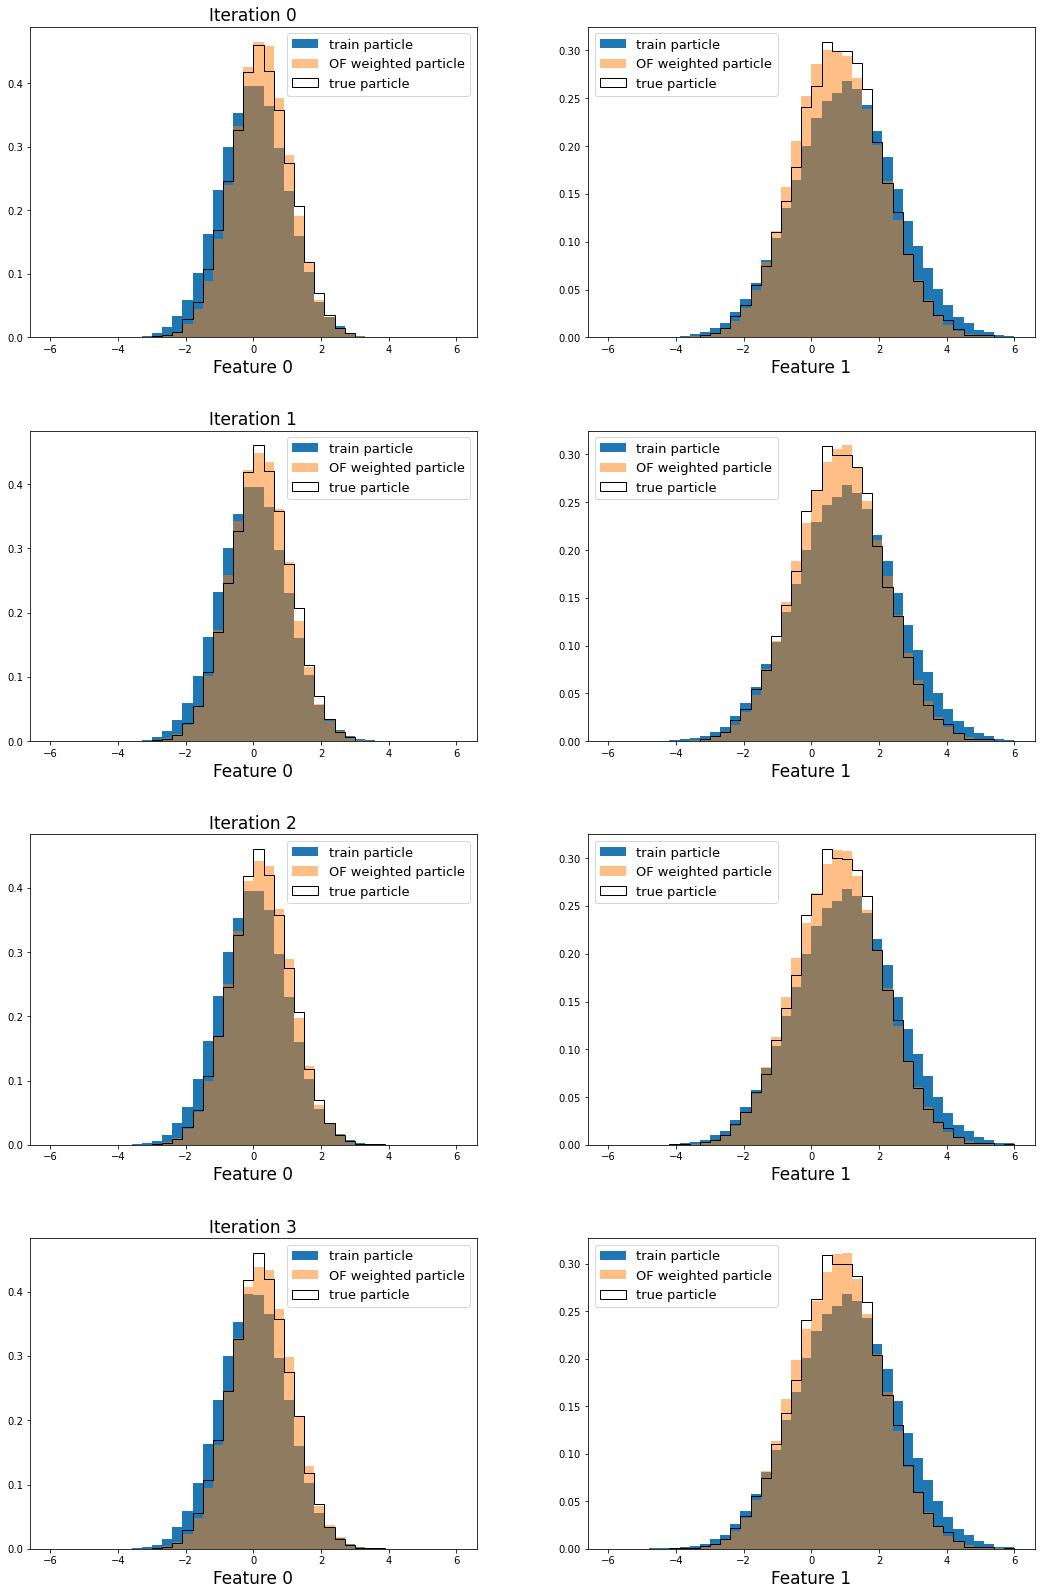

In [19]:


fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)
    
    
    ax[ofi][0].set_xlabel('Feature 0', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel('Feature 1', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

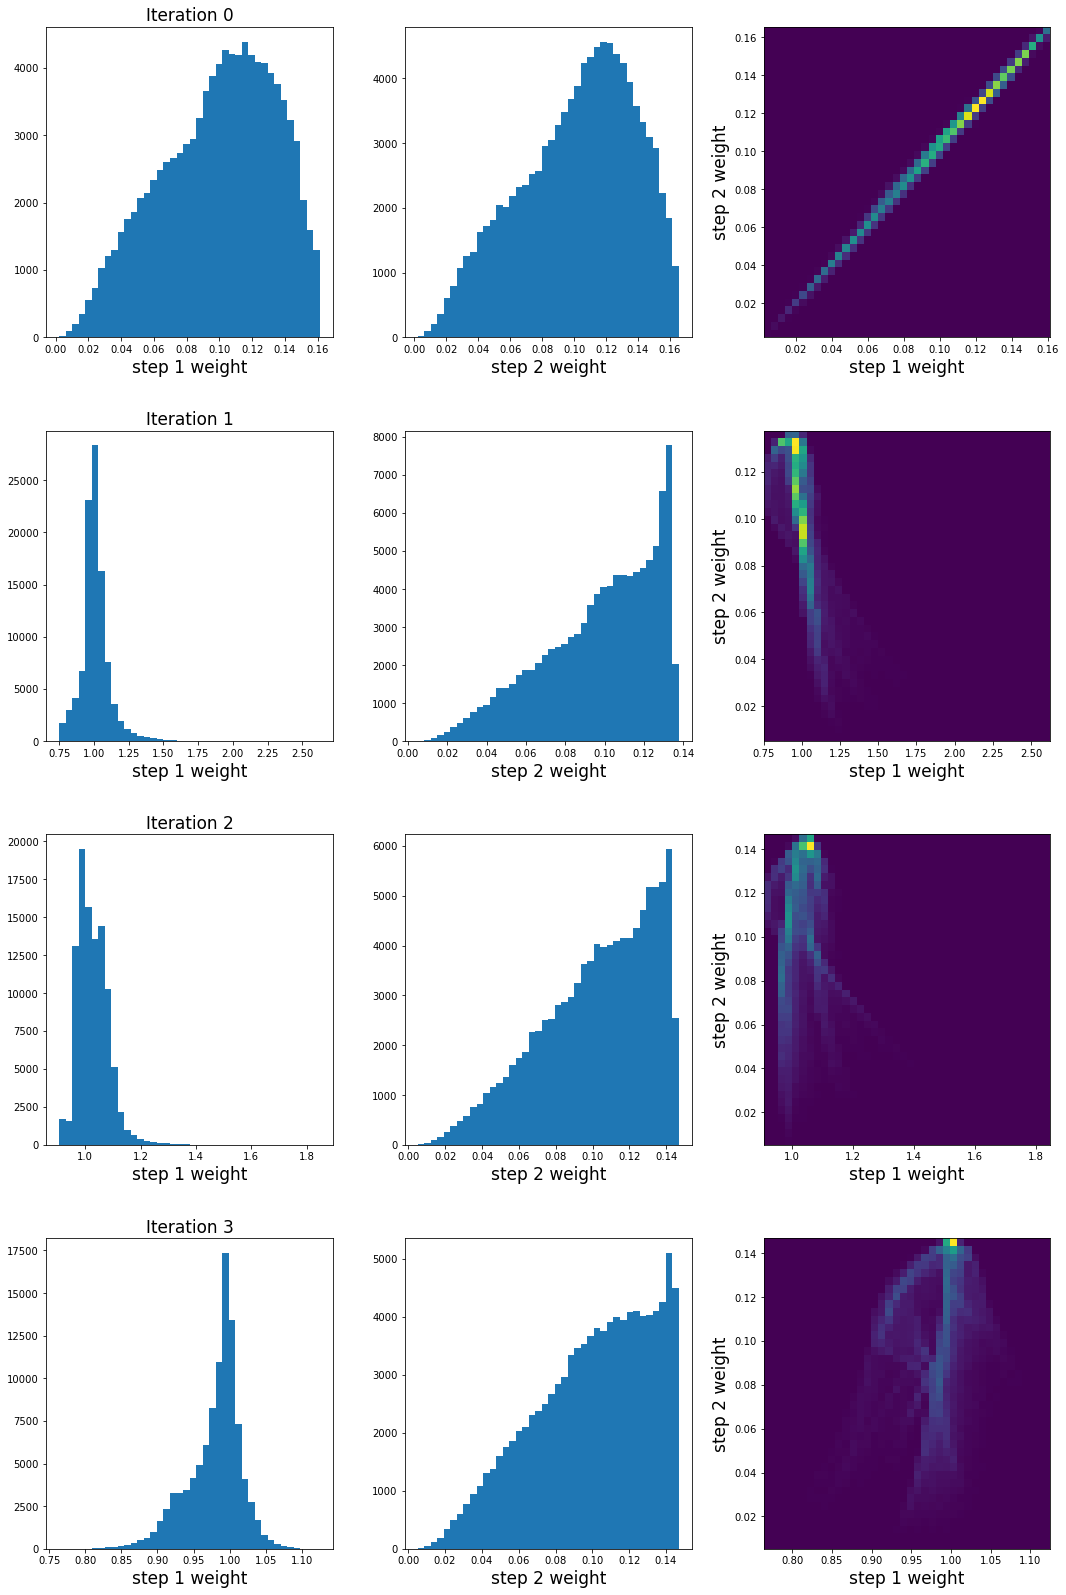

In [20]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist( of_weights[ofi,0,:], bins=hbins )
    ax[ofi][1].hist( of_weights[ofi,1,:], bins=hbins )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

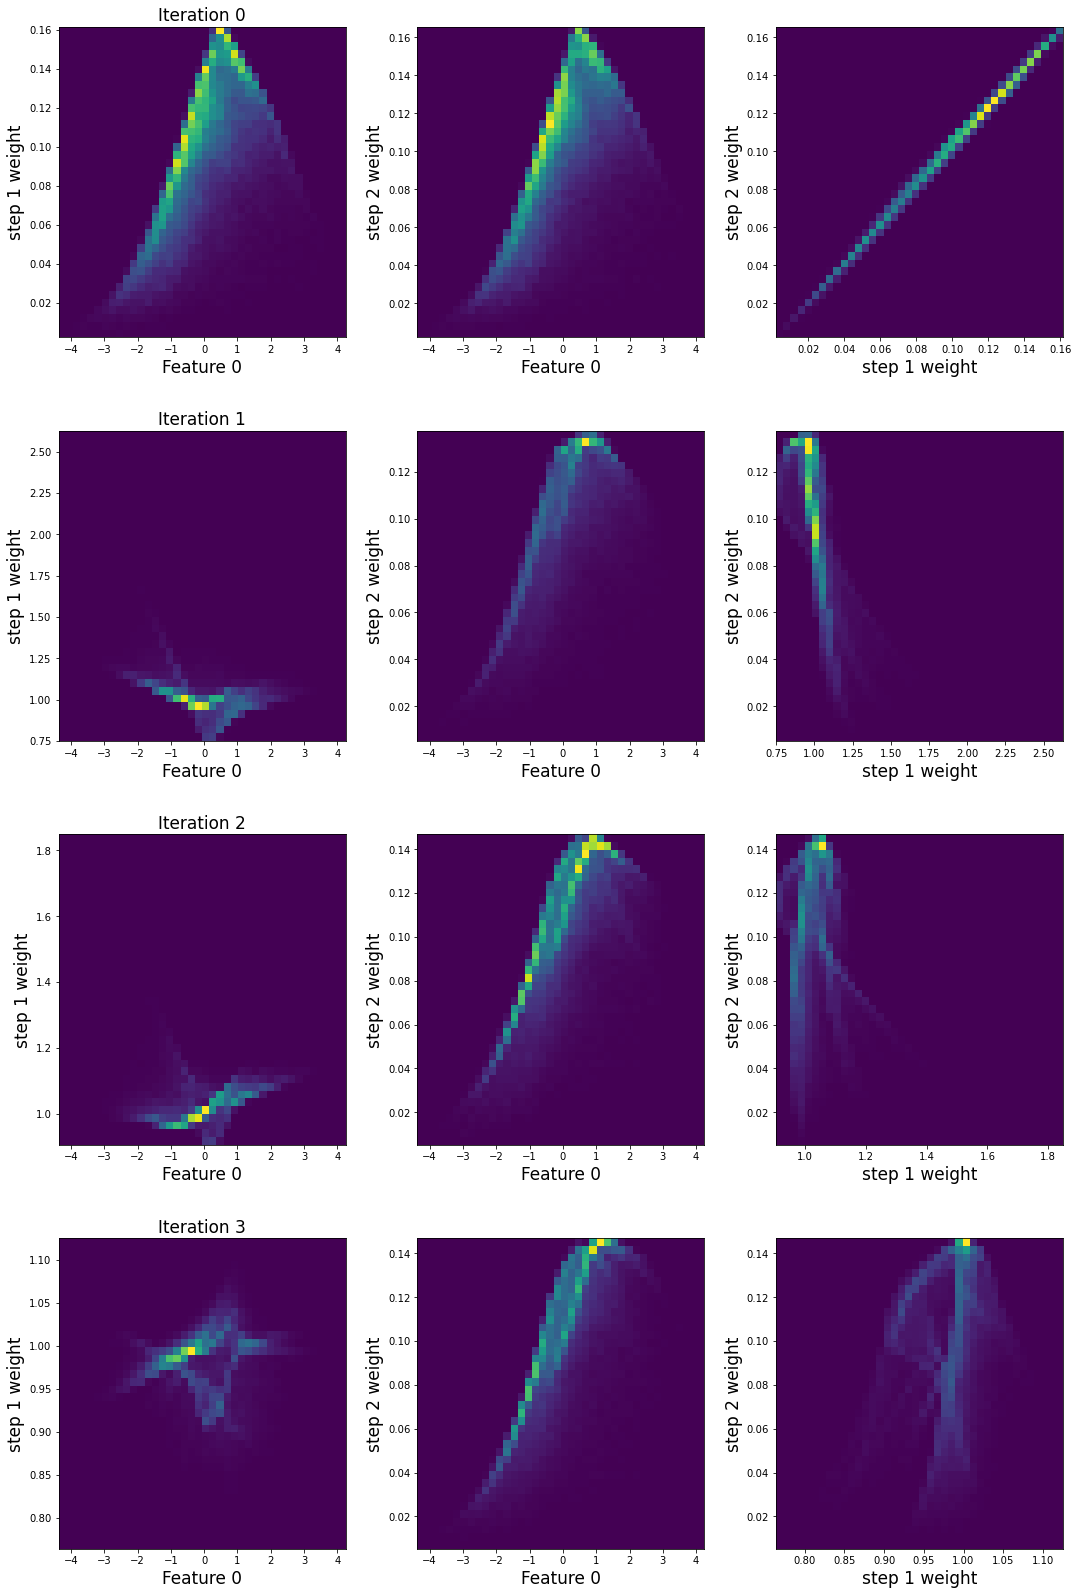

In [21]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist2d( train_pts[:,0], of_weights[ofi,0,:], bins=[hbins,hbins] )
    ax[ofi][1].hist2d( train_pts[:,0], of_weights[ofi,1,:], bins=[hbins,hbins] )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'Feature 0', fontsize=lfontsize )
    ax[ofi][0].set_ylabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'Feature 0', fontsize=lfontsize )
    ax[ofi][1].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

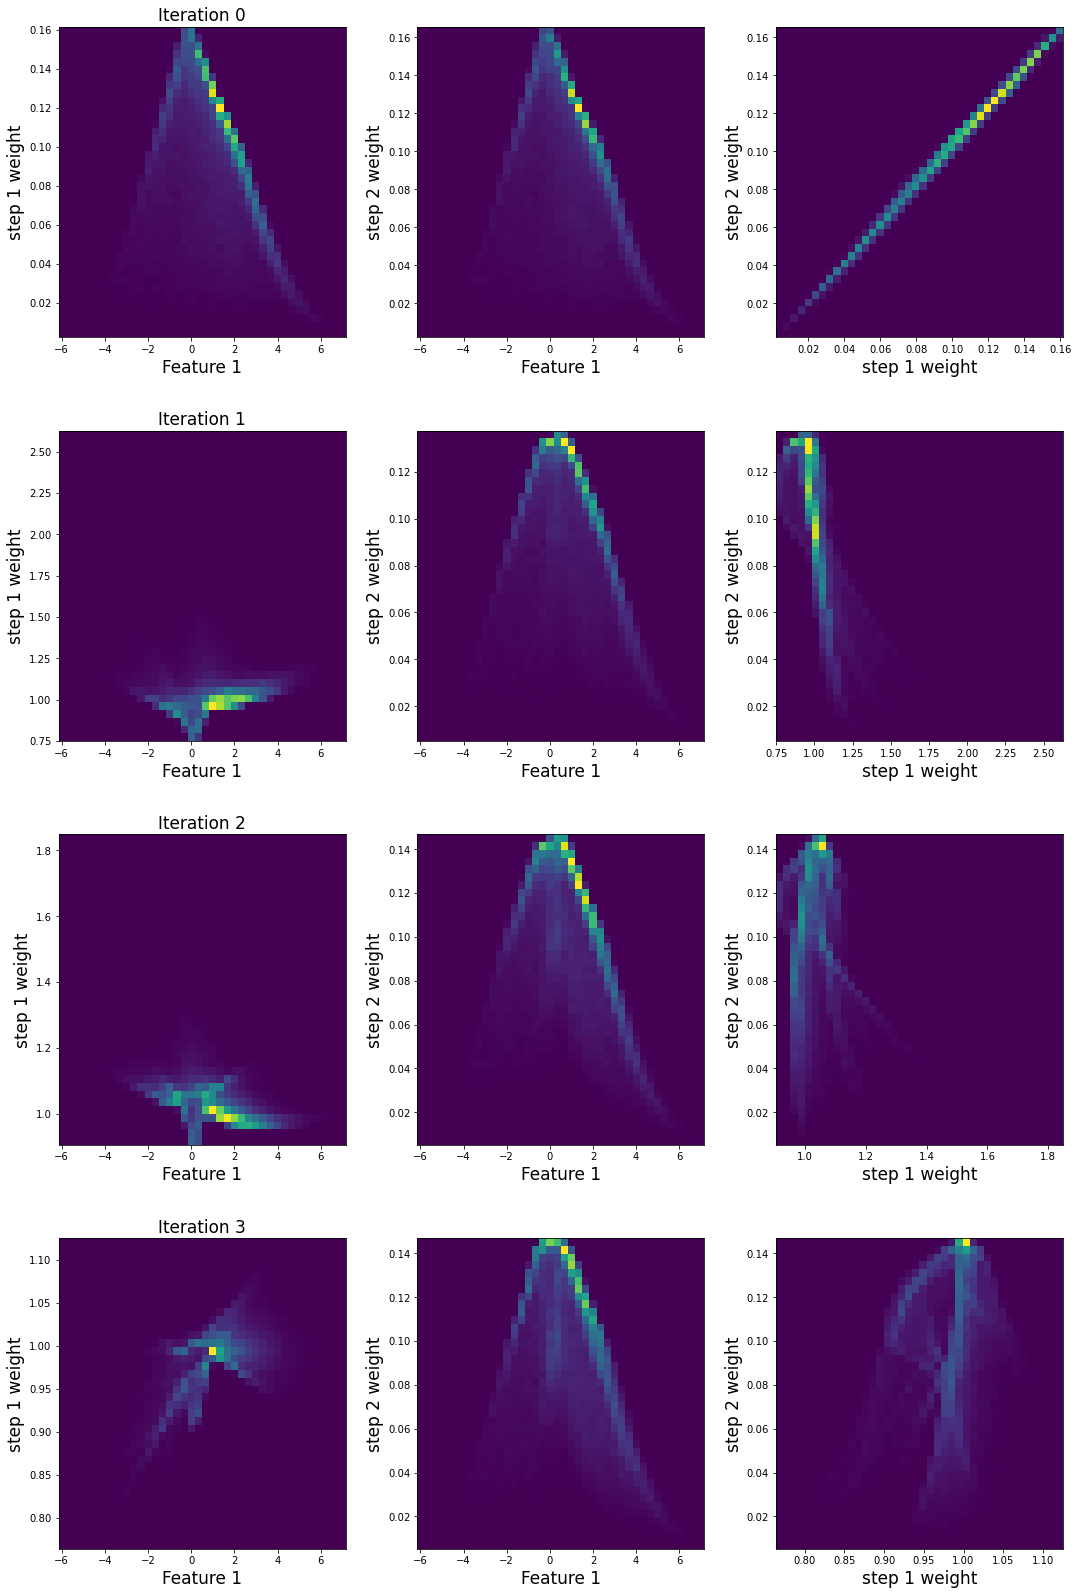

In [22]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist2d( train_pts[:,1], of_weights[ofi,0,:], bins=[hbins,hbins] )
    ax[ofi][1].hist2d( train_pts[:,1], of_weights[ofi,1,:], bins=[hbins,hbins] )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'Feature 1', fontsize=lfontsize )
    ax[ofi][0].set_ylabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'Feature 1', fontsize=lfontsize )
    ax[ofi][1].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

In [23]:
max_step2_weight = np.max( of_weights[3,1,:] )

<function matplotlib.pyplot.show(close=None, block=None)>

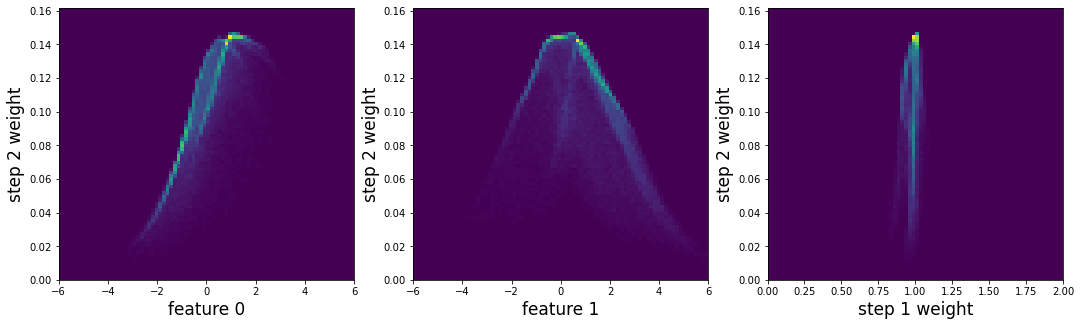

In [24]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))

hmin=-6
hmax=6
hbins=80

ax[0].hist2d( train_pts[:,0], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,1.1*max_step2_weight]))

ax[1].hist2d( train_pts[:,1], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,1.1*max_step2_weight]))

ax[2].hist2d( of_weights[3,0,:], of_weights[3,1,:], bins=[hbins,hbins], range=([0.,2.],[0.,1.1*max_step2_weight]))


lfontsize = 17

ax[0].set_xlabel( 'feature 0', fontsize=lfontsize )
ax[0].set_ylabel( 'step 2 weight', fontsize=lfontsize )


ax[1].set_xlabel( 'feature 1', fontsize=lfontsize )
ax[1].set_ylabel( 'step 2 weight', fontsize=lfontsize )

ax[2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
ax[2].set_ylabel( 'step 2 weight', fontsize=lfontsize )


plt.show


## Do the bootstrap samples in a loop

In [25]:
n_boot_samples = 250

do_bootstrap = True

verbose = False

bootstrap_weights = np.zeros( shape=(n_boot_samples, len(train_pts) ))

In [26]:
%%time

rng = np.random.default_rng()

for bi in range(0,n_boot_samples) :
    
    if do_bootstrap :
        print("\n Creating bootstrap sample %3d" % bi )
        #boot_true_det_pts = np.random.Generator.choice( true_det_pts, size=len(true_det_pts) )
        boot_true_det_pts = rng.choice( true_det_pts, size=len(true_det_pts) )
        
    else :
        print("\n Creating toy sample %3d" % bi )
        boot_true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen_true)
        boot_true_det_pts = np.random.normal( boot_true_pts, [res0, res1])
        
    boot_of_weights = of.omnifold( train_both, boot_true_det_pts, of_niter, model, verbose)
    
    bootstrap_weights[bi] = boot_of_weights[3,1,:]
    


 Creating bootstrap sample   0
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample   1
10/10 [==============================] - 0s 756us/step

 Creating bootstrap sample   2
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample   3
10/10 [==============================] - 0s 683us/step

 Creating bootstrap sample   4
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample   5
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample   6
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample   7
10/10 [==============================] - 0s 771us/step

 Creating bootstrap sample   8
10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample   9
10/10 [==============================] - 0s 635us/step

 Creating bootstrap sample  10
10/10 [==============================] - 0s 656us/step

 Creating bootstrap sample  11
10/10 [====

10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample  12
10/10 [==============================] - 0s 678us/step

 Creating bootstrap sample  13
10/10 [==============================] - 0s 750us/step

 Creating bootstrap sample  14
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample  15
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample  16
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample  17
10/10 [==============================] - 0s 676us/step

 Creating bootstrap sample  18
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample  19
10/10 [==============================] - 0s 697us/step

 Creating bootstrap sample  20
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample  21
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample  22
10/10 [==============================] - 0s

10/10 [==============================] - 0s 818us/step

 Creating bootstrap sample  24
10/10 [==============================] - 0s 675us/step

 Creating bootstrap sample  25
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample  26
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample  27
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample  28
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample  29
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample  30
10/10 [==============================] - 0s 684us/step

 Creating bootstrap sample  31
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample  32
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample  33
10/10 [==============================] - 0s 768us/step

 Creating bootstrap sample  34
10/10 [==============================] - 0s

10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample  36
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample  37
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample  38
10/10 [==============================] - 0s 774us/step

 Creating bootstrap sample  39
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample  40
10/10 [==============================] - 0s 681us/step

 Creating bootstrap sample  41
10/10 [==============================] - 0s 789us/step

 Creating bootstrap sample  42
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample  43
10/10 [==============================] - 0s 650us/step

 Creating bootstrap sample  44
10/10 [==============================] - 0s 745us/step

 Creating bootstrap sample  45
10/10 [==============================] - 0s 763us/step

 Creating bootstrap sample  46
10/10 [==============================] - 0s

10/10 [==============================] - 0s 686us/step

 Creating bootstrap sample  48
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample  49
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample  50
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample  51
10/10 [==============================] - 0s 763us/step

 Creating bootstrap sample  52
10/10 [==============================] - 0s 755us/step

 Creating bootstrap sample  53
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample  54
10/10 [==============================] - 0s 644us/step

 Creating bootstrap sample  55
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample  56
10/10 [==============================] - 0s 646us/step

 Creating bootstrap sample  57
10/10 [==============================] - 0s 641us/step

 Creating bootstrap sample  58
10/10 [==============================] - 0s

10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample  60
10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample  61
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample  62
10/10 [==============================] - 0s 662us/step

 Creating bootstrap sample  63
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample  64
10/10 [==============================] - 0s 673us/step

 Creating bootstrap sample  65
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample  66
10/10 [==============================] - 0s 771us/step

 Creating bootstrap sample  67
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample  68
10/10 [==============================] - 0s 669us/step

 Creating bootstrap sample  69
10/10 [==============================] - 0s 666us/step

 Creating bootstrap sample  70
10/10 [==============================] - 0s

10/10 [==============================] - 0s 670us/step

 Creating bootstrap sample  72
10/10 [==============================] - 0s 697us/step

 Creating bootstrap sample  73
10/10 [==============================] - 0s 795us/step

 Creating bootstrap sample  74
10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample  75
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample  76
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample  77
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample  78
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample  79
10/10 [==============================] - 0s 682us/step

 Creating bootstrap sample  80
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample  81
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample  82
10/10 [==============================] - 0s

10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample  83
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample  84
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample  85
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample  86
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample  87
10/10 [==============================] - 0s 624us/step

 Creating bootstrap sample  88
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample  89
10/10 [==============================] - 0s 652us/step

 Creating bootstrap sample  90
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample  91
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample  92
10/10 [==============================] - 0s 668us/step

 Creating bootstrap sample  93
10/10 [==============================] - 0s

10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample  95
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample  96
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample  97
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample  98
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample  99
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 100
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 101
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 102
10/10 [==============================] - 0s 750us/step

 Creating bootstrap sample 103
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 104
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 105
10/10 [==============================] - 0s

10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample 107
10/10 [==============================] - 0s 767us/step

 Creating bootstrap sample 108
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 109
10/10 [==============================] - 0s 668us/step

 Creating bootstrap sample 110
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 111
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample 112
10/10 [==============================] - 0s 838us/step

 Creating bootstrap sample 113
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 114
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 115
10/10 [==============================] - 0s 783us/step

 Creating bootstrap sample 116
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample 117
10/10 [==============================] - 0s

10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 119
10/10 [==============================] - 0s 622us/step

 Creating bootstrap sample 120
10/10 [==============================] - 0s 648us/step

 Creating bootstrap sample 121
10/10 [==============================] - 0s 664us/step

 Creating bootstrap sample 122
10/10 [==============================] - 0s 682us/step

 Creating bootstrap sample 123
10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample 124
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 125
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 126
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 127
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 128
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample 129
10/10 [==============================] - 0s

10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 131
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 132
10/10 [==============================] - 0s 767us/step

 Creating bootstrap sample 133
10/10 [==============================] - 0s 658us/step

 Creating bootstrap sample 134
10/10 [==============================] - 0s 768us/step

 Creating bootstrap sample 135
10/10 [==============================] - 0s 776us/step

 Creating bootstrap sample 136
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 137
10/10 [==============================] - 0s 764us/step

 Creating bootstrap sample 138
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 139
10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample 140
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 141
10/10 [==============================] - 0s

10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 143
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 144
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 145
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 146
10/10 [==============================] - 0s 684us/step

 Creating bootstrap sample 147
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample 148
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 149
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 150
10/10 [==============================] - 0s 648us/step

 Creating bootstrap sample 151
10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample 152
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample 153
10/10 [==============================] - 0s

10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 154
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample 155
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 156
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample 157
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 158
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 159
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 160
10/10 [==============================] - 0s 643us/step

 Creating bootstrap sample 161
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 162
10/10 [==============================] - 0s 670us/step

 Creating bootstrap sample 163
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 164
10/10 [==============================] - 0s

10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 166
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample 167
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 168
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 169
10/10 [==============================] - 0s 623us/step

 Creating bootstrap sample 170
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 171
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 172
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample 173
10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample 174
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 175
10/10 [==============================] - 0s 756us/step

 Creating bootstrap sample 176
10/10 [==============================] - 0s

10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample 178
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample 179
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample 180
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 181
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample 182
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 183
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 184
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample 185
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 186
10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample 187
10/10 [==============================] - 0s 775us/step

 Creating bootstrap sample 188
10/10 [==============================] - 0s

10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 190
10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample 191
10/10 [==============================] - 0s 769us/step

 Creating bootstrap sample 192
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 193
10/10 [==============================] - 0s 754us/step

 Creating bootstrap sample 194
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample 195
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 196
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 197
10/10 [==============================] - 0s 672us/step

 Creating bootstrap sample 198
10/10 [==============================] - 0s 661us/step

 Creating bootstrap sample 199
10/10 [==============================] - 0s 650us/step

 Creating bootstrap sample 200
10/10 [==============================] - 0s

10/10 [==============================] - 0s 668us/step

 Creating bootstrap sample 202
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 203
10/10 [==============================] - 0s 685us/step

 Creating bootstrap sample 204
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 205
10/10 [==============================] - 0s 671us/step

 Creating bootstrap sample 206
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample 207
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 208
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample 209
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 210
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample 211
10/10 [==============================] - 0s 639us/step

 Creating bootstrap sample 212
10/10 [==============================] - 0s

10/10 [==============================] - 0s 745us/step

 Creating bootstrap sample 214
10/10 [==============================] - 0s 623us/step

 Creating bootstrap sample 215
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 216
10/10 [==============================] - 0s 788us/step

 Creating bootstrap sample 217
10/10 [==============================] - 0s 633us/step

 Creating bootstrap sample 218
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample 219
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 220
10/10 [==============================] - 0s 683us/step

 Creating bootstrap sample 221
10/10 [==============================] - 0s 768us/step

 Creating bootstrap sample 222
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample 223
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 224
10/10 [==============================] - 0s

10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample 225
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample 226
10/10 [==============================] - 0s 750us/step

 Creating bootstrap sample 227
10/10 [==============================] - 0s 766us/step

 Creating bootstrap sample 228
10/10 [==============================] - 0s 762us/step

 Creating bootstrap sample 229
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 230
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 231
10/10 [==============================] - 0s 759us/step

 Creating bootstrap sample 232
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 233
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 234
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 235
10/10 [==============================] - 0s

10/10 [==============================] - 0s 781us/step

 Creating bootstrap sample 237
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 238
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 239
10/10 [==============================] - 0s 697us/step

 Creating bootstrap sample 240
10/10 [==============================] - 0s 685us/step

 Creating bootstrap sample 241
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 242
10/10 [==============================] - 0s 660us/step

 Creating bootstrap sample 243
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 244
10/10 [==============================] - 0s 654us/step

 Creating bootstrap sample 245
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 246
10/10 [==============================] - 0s 778us/step

 Creating bootstrap sample 247
10/10 [==============================] - 0s

10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 249
10/10 [==============================] - 0s 724us/step
CPU times: user 2h 19min 1s, sys: 12min 4s, total: 2h 31min 6s
Wall time: 1h 51min 57s


In [27]:
bootstrap_weights

array([[0.11449279, 0.1112159 , 0.10147464, ..., 0.06834946, 0.13842398,
        0.07354156],
       [0.1044208 , 0.11050486, 0.10079502, ..., 0.0720868 , 0.13363458,
        0.06823434],
       [0.1371869 , 0.10825434, 0.09954892, ..., 0.06686319, 0.12714043,
        0.05755786],
       ...,
       [0.11231489, 0.11263113, 0.10325308, ..., 0.07762849, 0.11875297,
        0.03462265],
       [0.11178154, 0.0996213 , 0.09745795, ..., 0.06973926, 0.11123727,
        0.07085601],
       [0.09646655, 0.10943247, 0.10533886, ..., 0.0618181 , 0.11216336,
        0.06240848]])

In [28]:
of_weights[3,1,:]

array([0.13704236, 0.1095103 , 0.10347942, ..., 0.05873671, 0.13639495,
       0.06893534])

In [29]:
bootstrap_weights[0]

array([0.11449279, 0.1112159 , 0.10147464, ..., 0.06834946, 0.13842398,
       0.07354156])

In [30]:
np.cov( bootstrap_weights[:,0])

array(0.00037603)

In [31]:
bootstrap_weights[:,100]

array([0.09929915, 0.10260088, 0.12273384, 0.11315663, 0.09514961,
       0.10889364, 0.1032049 , 0.08875382, 0.09150611, 0.1121855 ,
       0.08886328, 0.08361918, 0.09576613, 0.0966663 , 0.09352501,
       0.09043806, 0.09100654, 0.09945751, 0.07722507, 0.06520945,
       0.08154965, 0.06889243, 0.08713597, 0.08976175, 0.08453047,
       0.10720605, 0.10812694, 0.07991984, 0.06890373, 0.07177783,
       0.0655534 , 0.06972799, 0.07000937, 0.07389726, 0.07492856,
       0.0918742 , 0.09538809, 0.11201413, 0.08274163, 0.08858835,
       0.08523652, 0.07216708, 0.07621221, 0.10221566, 0.09749513,
       0.09253609, 0.08284295, 0.08113528, 0.09086843, 0.10209877,
       0.08347022, 0.07867277, 0.0800099 , 0.07460859, 0.08915019,
       0.08195169, 0.08743375, 0.10664901, 0.1104393 , 0.13418317,
       0.09602054, 0.07971475, 0.0701864 , 0.0741834 , 0.08187467,
       0.09634514, 0.08602711, 0.09971259, 0.08384761, 0.0660793 ,
       0.09639924, 0.08830064, 0.07851972, 0.05802245, 0.07007

<function matplotlib.pyplot.show(close=None, block=None)>

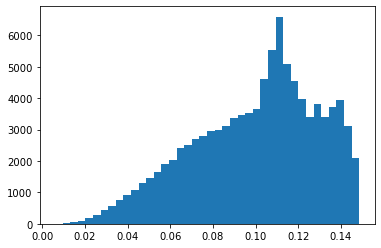

In [32]:
plt.hist( bootstrap_weights[1,:], bins=40)
plt.show

In [33]:
np.mean( bootstrap_weights, axis=0 )

array([0.11457233, 0.11124467, 0.10075721, ..., 0.06976443, 0.12421034,
       0.06034956])

In [34]:
bootstrap_w2 = bootstrap_weights * bootstrap_weights

In [35]:
bootstrap_w2

array([[0.0131086 , 0.01236898, 0.0102971 , ..., 0.00467165, 0.0191612 ,
        0.00540836],
       [0.0109037 , 0.01221132, 0.01015964, ..., 0.00519651, 0.0178582 ,
        0.00465593],
       [0.01882025, 0.011719  , 0.00990999, ..., 0.00447069, 0.01616469,
        0.00331291],
       ...,
       [0.01261464, 0.01268577, 0.0106612 , ..., 0.00602618, 0.01410227,
        0.00119873],
       [0.01249511, 0.0099244 , 0.00949805, ..., 0.00486356, 0.01237373,
        0.00502057],
       [0.0093058 , 0.01197546, 0.01109628, ..., 0.00382148, 0.01258062,
        0.00389482]])

In [36]:
bootstrap_variance = np.mean( bootstrap_w2, axis=0 ) - np.mean( bootstrap_weights, axis=0 ) * np.mean( bootstrap_weights, axis=0 )

In [37]:
bootstrap_variance

array([3.74525402e-04, 9.95121582e-05, 9.02953175e-05, ...,
       1.08717104e-04, 1.27466384e-04, 3.42145014e-04])

In [38]:
bootstrap_rms = np.sqrt( bootstrap_variance )

In [39]:
bootstrap_rms

array([0.01935266, 0.00997558, 0.00950238, ..., 0.01042675, 0.0112901 ,
       0.01849716])

In [40]:
bootstrap_weights.shape

(250, 100000)

In [41]:
bootstrap_weights.T.shape

(100000, 250)

In [42]:
bootstrap_weights_dot = np.dot( bootstrap_weights, bootstrap_weights.T )

In [43]:
bootstrap_weights_dot

array([[1084.39011951, 1082.88504384, 1089.68926674, ..., 1088.3256661 ,
        1021.85732983, 1056.37733875],
       [1082.88504384, 1088.54575931, 1093.29434128, ..., 1093.3185908 ,
        1026.27030045, 1062.17061483],
       [1089.68926674, 1093.29434128, 1106.40515329, ..., 1102.72234881,
        1035.63326946, 1070.3802994 ],
       ...,
       [1088.3256661 , 1093.3185908 , 1102.72234881, ..., 1130.67967223,
        1051.78099874, 1083.750656  ],
       [1021.85732983, 1026.27030045, 1035.63326946, ..., 1051.78099874,
         999.36697137, 1027.60904102],
       [1056.37733875, 1062.17061483, 1070.3802994 , ..., 1083.750656  ,
        1027.60904102, 1080.2827205 ]])

In [44]:
bootstrap_weights_dot.shape

(250, 250)

In [45]:
combined_row = np.row_stack( (bootstrap_weights[:,0], bootstrap_weights[:,2]))

In [46]:
pair_cov_rs = np.cov( combined_row )

In [47]:
pair_cov_rs

array([[3.76029520e-04, 2.00180388e-05],
       [2.00180388e-05, 9.06579493e-05]])

In [48]:
pair_cor = np.corrcoef(combined_row)

In [49]:
pair_cor

array([[1.        , 0.10841955],
       [0.10841955, 1.        ]])

In [50]:
pair_cor[0,1]

0.108419552659897

In [203]:
ncalc = 100000
corr_array = np.zeros( ncalc )

point_index = 24

for i in range(ncalc) :
    pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
    corr_array[i] = pair_cor[0,1]


In [204]:
corr_array

array([-0.03169369,  0.12837748,  0.06097748, ...,  0.01430462,
        0.02947644,  0.08635988])

<function matplotlib.pyplot.show(close=None, block=None)>

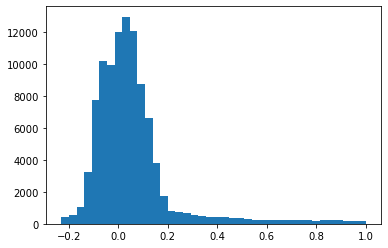

In [205]:
plt.hist( corr_array, bins=40)
plt.show

In [206]:
train_pts[point_index]

array([0.9433066 , 0.94263321])

In [207]:
df0 = train_pts[:,0] - train_pts[point_index,0]
df1 = train_pts[:,1] - train_pts[point_index,1]
dr = np.sqrt( df0*df0 + df1*df1)

<function matplotlib.pyplot.show(close=None, block=None)>

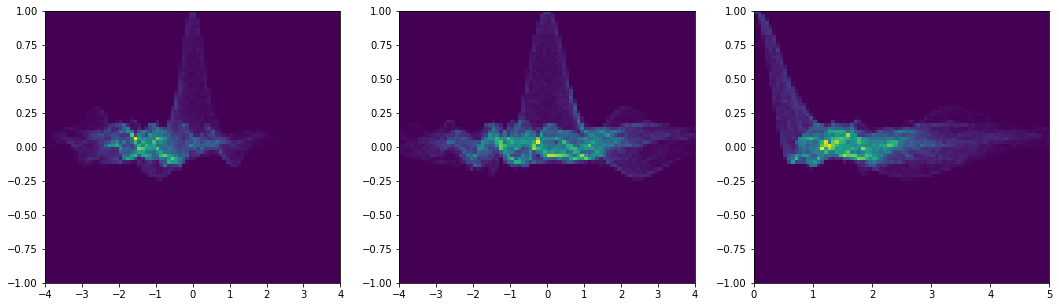

In [208]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( df0, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( df1, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( dr, corr_array, bins=[80,80], range=([0,5],[-1,1]))
plt.show

## Save the output

In [57]:
output_filebase = 'bootstrap-output-test1g'

In [58]:
with open( '%s.npy' % output_filebase, 'wb') as f :
    np.save(f, train_pts)
    np.save(f, train_det_pts)
    np.save(f, true_pts)
    np.save(f, true_det_pts)
    np.save(f, bootstrap_weights)
    

In [59]:
train_pts.shape

(100000, 2)

In [60]:
train_det_pts

array([[ 2.23225767, -0.36347394],
       [ 0.20360738,  2.01815517],
       [ 0.22728404,  2.30015019],
       ...,
       [-1.33199388,  3.05106288],
       [ 0.19174391,  0.83092909],
       [-0.69455985, -0.31166876]])

In [61]:
true_det_pts

array([[-0.11200008,  1.74172125],
       [ 0.5038191 ,  0.50441332],
       [ 0.78662262,  1.97263345],
       ...,
       [ 0.85062012,  0.19377598],
       [ 0.81475845,  0.30959401],
       [ 0.14160344,  0.34329686]])

In [62]:
true_det_pts.shape

(10000, 2)

In [63]:
bootstrap_weights

array([[0.11449279, 0.1112159 , 0.10147464, ..., 0.06834946, 0.13842398,
        0.07354156],
       [0.1044208 , 0.11050486, 0.10079502, ..., 0.0720868 , 0.13363458,
        0.06823434],
       [0.1371869 , 0.10825434, 0.09954892, ..., 0.06686319, 0.12714043,
        0.05755786],
       ...,
       [0.11231489, 0.11263113, 0.10325308, ..., 0.07762849, 0.11875297,
        0.03462265],
       [0.11178154, 0.0996213 , 0.09745795, ..., 0.06973926, 0.11123727,
        0.07085601],
       [0.09646655, 0.10943247, 0.10533886, ..., 0.0618181 , 0.11216336,
        0.06240848]])

In [64]:
bootstrap_weights.shape

(250, 100000)